In [1]:
from layers import *
from synaptics import *
from visual_env import *
from stats import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PARAMETERS OF NETWORK:
retina_size = (1, 10)
resolution = .1
input_layer_size = retina_size[0] * retina_size[1]
output_layer_size = 1
tau = 30
triplet_tau = 0
preset = 'RS'
g_strength = 200

In [3]:
layer0 = IzhikevichLayer(size=input_layer_size, resolution=resolution, tau=tau, preset=preset, noize=1)
layer0.transmitter_impact = g_strength
layer1 = IzhikevichLayer(size=output_layer_size, resolution=resolution, tau=tau, preset=preset, noize=1)
synapse = Synapse(layer0, layer1)
rates0 = rate_capture(layer0)
rates1 = rate_capture(layer1)
synapse.load_weights(name='checkpoints\save10_1by3.npy')
#synapse.weights_init(mode='all_05')

In [ ]:
''' CAREFULLY! '''

In [8]:
weights = np.zeros(input_layer_size*output_layer_size).reshape(1, input_layer_size, output_layer_size)
pre_v = np.zeros(input_layer_size).reshape(1, input_layer_size)
pre_syn = np.zeros(input_layer_size).reshape(1, input_layer_size)
post_v = np.zeros(output_layer_size).reshape(1, output_layer_size)
post_syn = np.zeros(output_layer_size).reshape(1, output_layer_size)
rates0.reset()
rates1.reset()

In [12]:
vis = retina(size=retina_size)
pattern = np.ones(3).reshape(1,3) * 25
vis.add_object(pattern)
vis.set_position_lazy(x='right', y='centered')
state = vis.show_current_state()
print(state)
print(vis.buffer_screen)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 25. 25. 25.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [13]:
g_strength = 85
layer0.transmitter_impact = g_strength

t = 5000
time = int(t / resolution)
lr = .01
alpha = 5
pattern_delay = int(4/ resolution)
direction = 'left'
gather_data = True
learn = False

for i in range(time):
    synapse.forward()
    picture = vis.tick(delay=pattern_delay, move_direction=direction, noize_density=.1, noize_acceleration=7, rest=int(220/resolution))
    layer0.apply_current(picture.flatten())
    layer1.forward()
    rates0.accumulate_spikes()
    rates1.accumulate_spikes()
    if learn:
        synapse.STDP(learning_rate=lr, assymetry=alpha)
    #synapse.STDP(learning_rate=lr, assymetry=alpha)
    if gather_data:
        #weights = np.append(weights, np.array([synapse.weights]), axis=0)
        pre_v = np.append(pre_v, np.array([layer0.v]), axis=0)
        pre_syn = np.append(pre_syn, np.array([layer0.impulses]), axis=0)
        post_v = np.append(post_v, np.array([layer1.v]), axis=0)
        post_syn = np.append(post_syn, np.array([layer1.impulses]), axis=0)
layer0.instant_rest()
layer1.instant_rest()

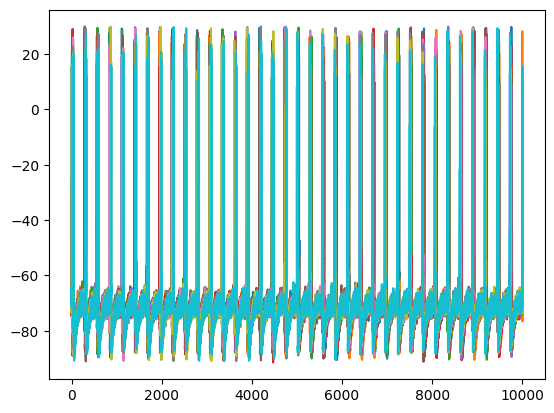

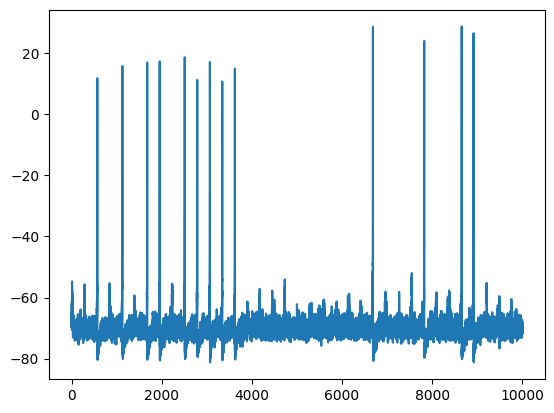

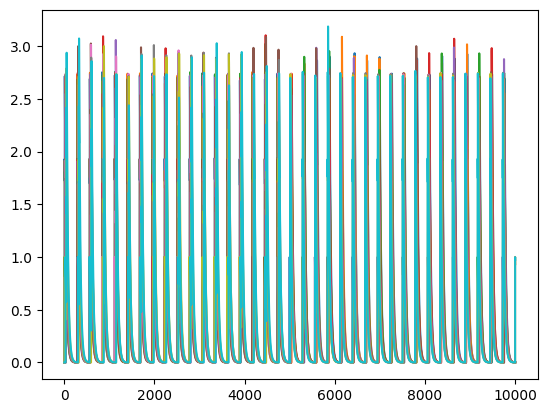

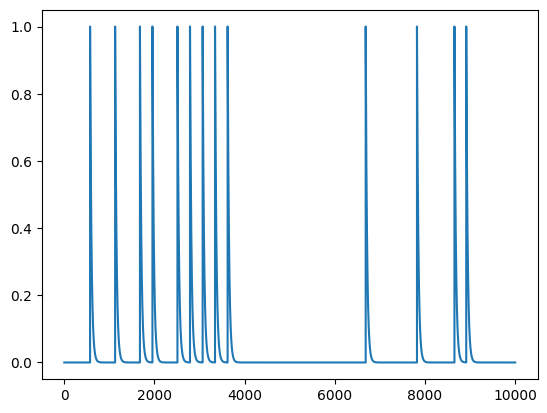

In [14]:
show_w = False

temp = None
x_scale = np.arange(int(pre_v.shape[0])) * resolution
if show_w:
    for i in range(weights.shape[1]):
        for j in range(weights.shape[2]):
            temp = np.array(weights[:,i,j]).flatten()
            plt.plot(x_scale[1:], temp[1:])
    plt.show()
for i in range(pre_v.shape[1]):
    temp = np.array(pre_v[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(post_v.shape[1]):
    temp = np.array(post_v[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(pre_syn.shape[1]):
    temp = np.array(pre_syn[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(post_syn.shape[1]):
    temp = np.array(post_syn[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()

In [ ]:
r0 = rates0.compute_spike_rates(time=t, interval=1000)
r1 = rates1.compute_spike_rates(time=t, interval=1000)
rates0.reset()
rates1.reset()
print(f'Spiking rates of presynaptic neurons: \n {r0}')
print(f'Spiking rates of output neuron: \n {r1}')

In [ ]:
#synapse.save_weights(name='checkpoints\www.npy')

In [ ]:
print(synapse.weights.T[0])
1.49                          0.99

In [ ]:
print(r0[5:5+5])
print(synapse.weights.T[0,5:5+5])

In [ ]:
plt.plot(np.arange(15)[5:5+5], synapse.weights.T[0][5:5+5])
plt.show()

In [ ]:
vis = retina(size=retina_size)
pattern = np.ones(3).reshape(1,3) * 50
vis.add_object(pattern)
vis.set_position_lazy(x='left', y='centered')
state = vis.show_current_state()
print(state)
print(vis.buffer_screen)

In [ ]:
vis.tick(delay=0, move_direction='right', noize_density=.2, noize_acceleration=0, rest=0)
state = vis.show_current_state()
print(state)
print(vis.buffer_screen)

In [ ]:
a = np.arange(9).reshape(3,3)
b = np.array([5,5,5])
a[0] += b
b[-1]


In [ ]:
def test(a=5):
    temp = 1
    for n in range(0, a):
        temp += temp * n
        yield temp

[i for i in test(a=6)]

In [ ]:
def qtest():
    i = 0
    for n in range(10):
        yield 'n = ', n
    while i < 10:
        i += 1 
        yield i


In [ ]:
for i in qtest():
    print(i)